In [3]:
%load_ext autoreload
%autoreload 2

import xdrt as xdr
import SimpleITK as sitk
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def make_canonical(filename):
    img = sitk.ReadImage(filename)
    filt = sitk.DICOMOrientImageFilter()
    img = filt.Execute(img)
    return img

In [5]:
img0 = sitk.ReadImage('/Users/jonas/Dropbox/XDR/21602082_m42.nii')
img1 = sitk.ReadImage('/Users/jonas/Dropbox/XDR/21602082_m42_reorient.nii.gz')
img2 = sitk.ReadImage('/Users/jonas/Dropbox/XDR/21802911_m42.nii')

In [57]:
def make_canonical_data(data, direction, make_affine=True):
    img = sitk.GetImageFromArray(data, isVector=data.shape[-1] == 3)
    img.SetDirection(direction)
    # img.SetOrigin(origin)
    if make_affine:
        filt = sitk.DICOMOrientImageFilter()
        img = filt.Execute(img)
    return img


In [98]:
def plot_center(data, cmap="gray"):
    shapes = np.asarray(data.shape) // 2
    fig, axs = plt.subplots(1, 3, figsize=(25,5))
    axs[0].imshow(data[49, :, :, :], cmap=cmap)
    axs[0].set_title("axial")
    axs[1].imshow(data[:, :, 42, :][::-1], cmap=cmap)
    axs[1].set_title("sagittal")
    axs[2].imshow(data[:, 28, :, :][::-1], cmap=cmap)
    axs[2].set_title("coronal")
    fig.tight_layout()

In [139]:
xdr_image = xdr.read('/Users/jonas/Dropbox/XDR/2.16.840.1.113669.2.931128.58680984.20140103091815.297206.WFInv')
data = xdr_image.data
print(data.shape)

# data, real_affine, header = xdr.read('/Users/jonas/Dropbox/XDR/21602082.X10')

(10, 56, 64, 83, 3)


In [59]:
import itertools
affines = []
def I(n):
    A = []
    for i in range(n):
        A.append([1 if j == i else 0 for j in range(n)])
    return A
A = I(3)
for m in itertools.permutations(A):
    affines.append(np.asarray(m))
#tests:
affines[2], affines[4]

(array([[0, 1, 0],
        [1, 0, 0],
        [0, 0, 1]]),
 array([[0, 0, 1],
        [1, 0, 0],
        [0, 1, 0]]))

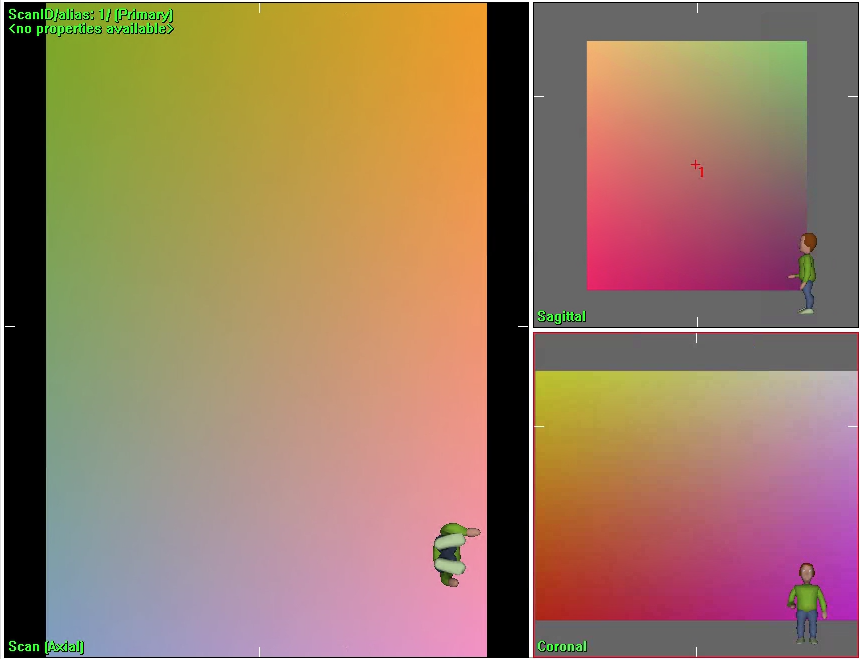

In [150]:
affine = np.array([[0, 0, 1.], [-1., 0, 0], [0, -1., 0]])
print(data.shape)

curr_data = data[0].transpose(0, 1, 2, 3)
for affine in affines:
    can_img = make_canonical_data(curr_data, affine.flatten().tolist(), make_affine=True)
    d = sitk.GetArrayFromImage(can_img)
    if list(d.shape)[0:3] == [64, 83, 56]:
        d -= d.min()
        d /= d.max()
        print(d.shape)
        # plot_center(d, cmap="jet")
        print(affine)


(10, 56, 64, 83, 3)
(64, 83, 56, 3)
[[0 0 1]
 [1 0 0]
 [0 1 0]]


In [ ]:
old_img = sitk.ReadImage('/Users/jonas/Dropbox/XDR/21802911_m42.nii')
data, header = xdr.read('/Users/jonas/Dropbox/XDR/21802911.X34')
print(old_img.GetOrigin(), old_img.GetDirection())
can_img = make_canonical_data(data, header.origin, header.direction, make_affine=False)

sitk.WriteImage(can_img, '/Users/jonas/Dropbox/XDR/21802911_xdr_tools2.nrrd',True)
print(can_img.GetOrigin())
# print(np.allclose(sitk.GetArrayFromImage(old_img), sitk.GetArrayFromImage(can_img)))


In [ ]:
header.origin

In [ ]:
header.affine

In [ ]:
header.min_ext + b[::-1]

In [ ]:
d, h = xdr.read('/Users/jonas/Dropbox/XDR/1.3.46.423632.1410002019916142046540.81.16.09.2019162047381.SCAN')

In [ ]:
plt.imshow(d[0,0,...,64],cmap="gray")

In [ ]:
t0 = d[0]

In [ ]:
direction = np.matmul(h.siddon_to_dicom, h.scan_to_siddon.transpose()[0:3, 0:3]).flatten().tolist()

In [ ]:
im0 = sitk.GetImageFromArray(d[0])
im0.SetDirection(direction)
filt = sitk.DICOMOrientImageFilter()
im0 = filt.Execute(im0)

In [ ]:
filt.GetFlipAxes()

In [ ]:
plt.imshow(sitk.GetArrayFromImage(im0)[64], cmap="gray")

In [ ]:
sitk.WriteImage(im0, '/Users/jonas/Dropbox/XDR/1.3.46.423632.1410002019916142046540.81.16.09.2019162047381_0_xdr_tools.nrrd', True)

In [ ]:
sitk.ReadImage('/Users/jonas/Dropbox/XDR/1.3.46.423632.1410002019916142046540.81.16.09.2019162047381.SCAN')

In [ ]:
filt.GetDesiredCoordinateOrientation()

In [2]:
filt.GetFlipAxes()

NameError: name 'filt' is not defined

In [ ]:
sitk_img, header = xdr.read_as_simpleitk('/Users/jonas/Dropbox/XDR/21802911.X34', return_header=True)

In [ ]:
header.__dict__

In [ ]:
sitk.WriteImage(sitk_img, '/Users/jonas/Dropbox/XDR/21802911_xdr_tools3.nrrd', True)

In [ ]:
sitk_img.GetDimension()

In [ ]:
h.__dict__

In [ ]:
img = sitk.ReadImage('/Users/jonas/Dropbox/XDR/2.16.840.1.113669.2.931128.58680984.20140103091815.297206_m42.nii')

In [ ]:
img.GetSize()